### Import Libraries

In [56]:
# Import Libraries
import numpy as np
import pandas as pd
import calendar
import datetime as dt

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [57]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/devgupta2619/Unemployment_Analysis/refs/heads/main/Unemployment%20in%20India.csv")

### Dataset First View

In [58]:
# Dataset First Look
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Dataset Rows & Columns count

In [59]:
# Dataset Rows & Columns count
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  768
Number of columns are:  7


### Dataset Information

In [60]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


#### Duplicate Values

In [61]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 27


#### Missing Values/Null Values

In [62]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


<Axes: >

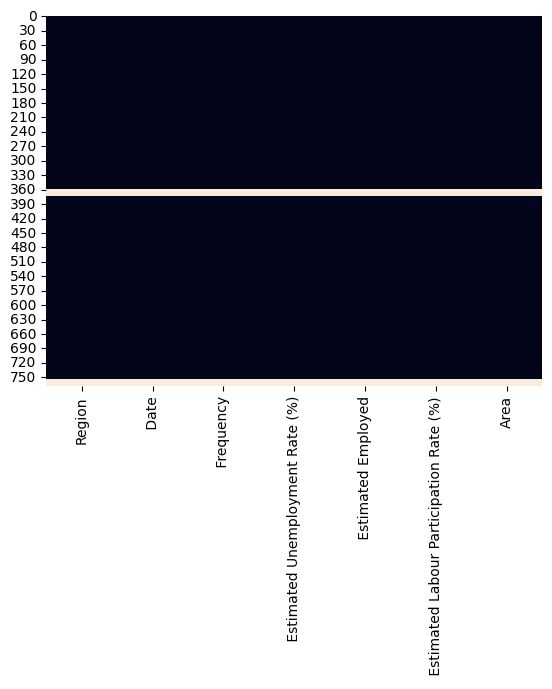

In [63]:
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

##  Understanding The Variables

In [64]:
# Dataset Columns
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [65]:
# Dataset Describe
df.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


### Check Unique Values for each variable.

In [66]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Region is 28
No. of unique values in  Date is 14
No. of unique values in  Frequency is 2
No. of unique values in  Estimated Unemployment Rate (%) is 624
No. of unique values in  Estimated Employed is 740
No. of unique values in  Estimated Labour Participation Rate (%) is 626
No. of unique values in Area is 2


##  Data Wrangling

### Data Wrangling Code

In [67]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

In [68]:
# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')

In [69]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [70]:
# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)

In [71]:
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()

In [72]:
# Drop all the missing values from 'df' dataset
df=df.dropna()

In [73]:
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]

In [74]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]

##  Data Vizualization - Understand the relationships between variables

#### Chart - 1 : Region Wise Estimated Unemployment Rate

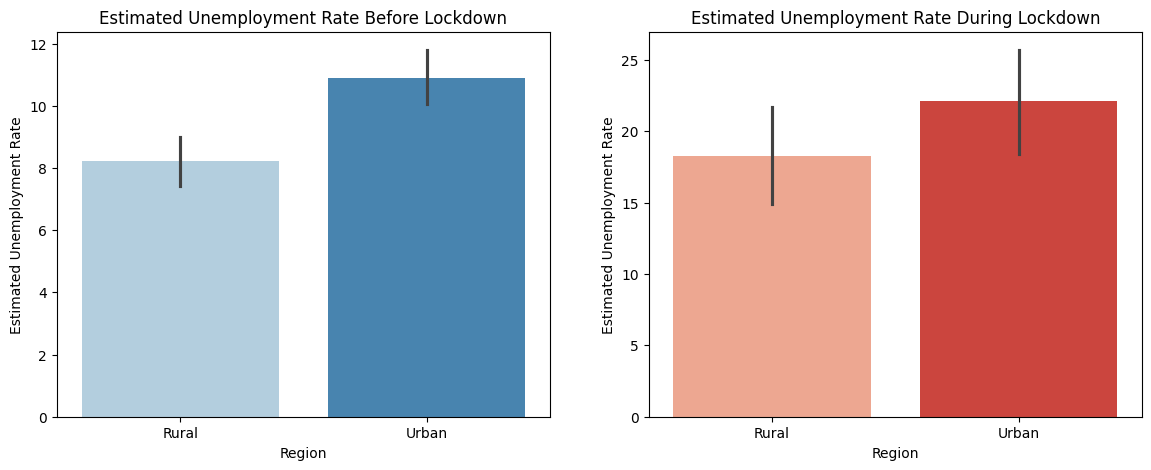

In [84]:
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot with a color palette
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df, palette='Blues')

plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot with a different color palette
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld, palette='Reds')

plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

# Display the subplots side by side.
plt.show()


##### What is/are the insight(s) found from the chart?

The charts reveal that the Estimated Unemployment Rate was significantly higher during the lockdown compared to the period before it.

#### Chart - 2 : Swarm Plot for State Wise Estimated Unemployment Rate

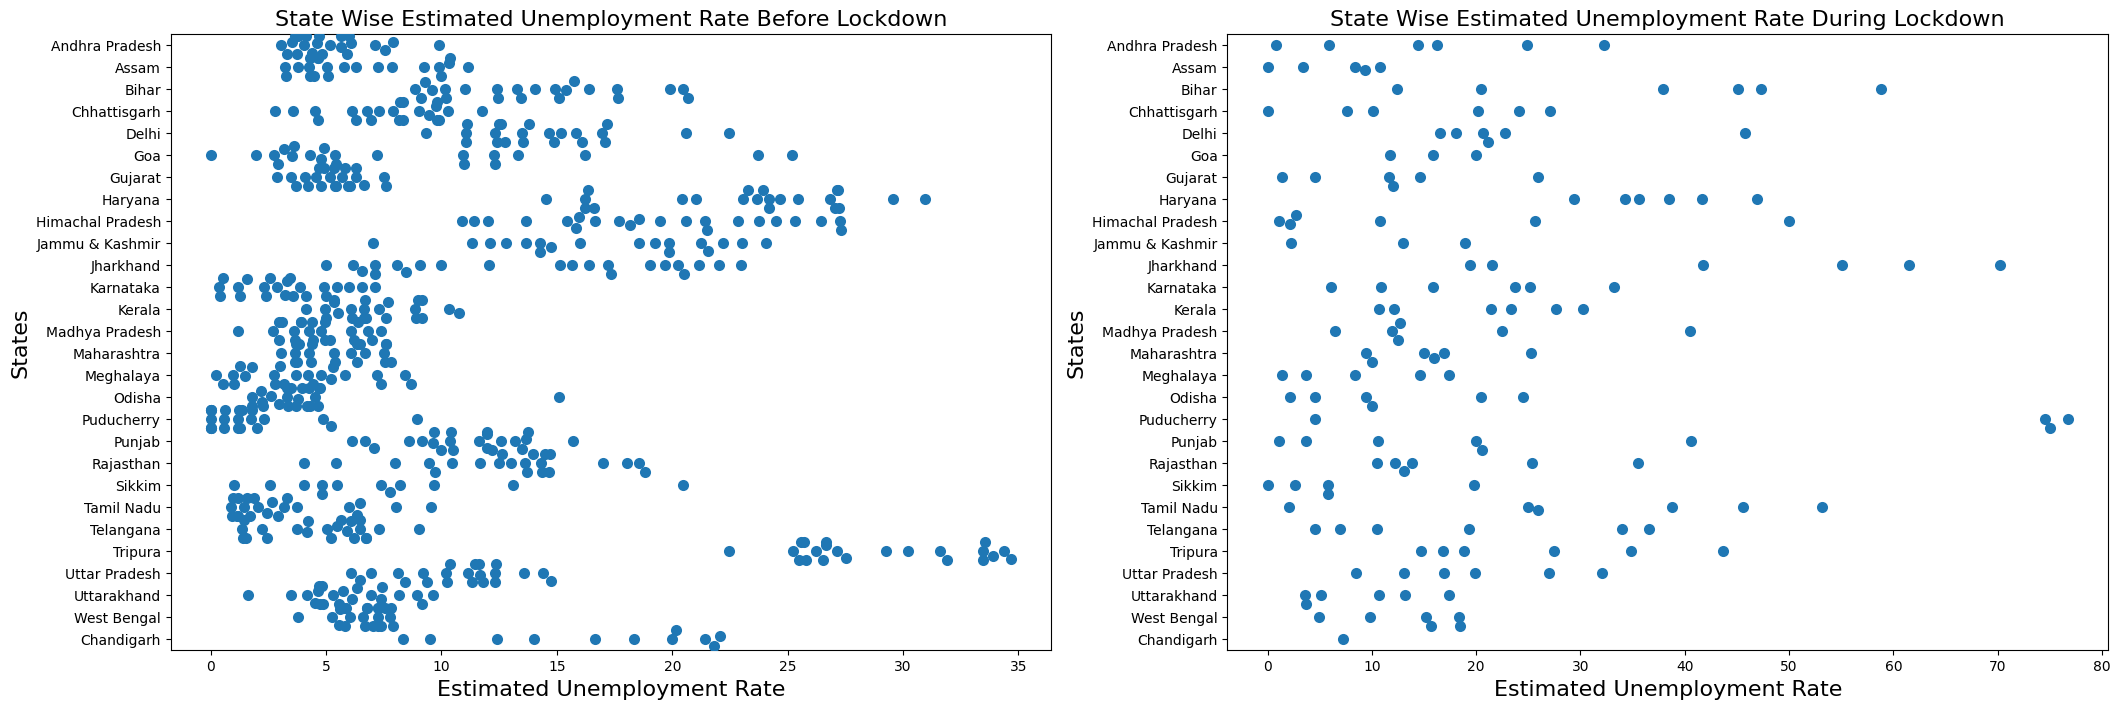

In [86]:
plt.figure(figsize=(25, 8))

# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8)
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8)
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()

##### What is/are the insight(s) found from the chart?

From the above charts we got to know that, in terms of State Wise Estimated Unemployment Rate, Puducherry and Jharkhand comes in top during the lockdown time. And before the lockdown period, Haryana and Tripura both are in top position for the Estimated Unemployment Rate.

#### Chart - 3 : Bar Plot for State Wise Estimated Unemployment Rate

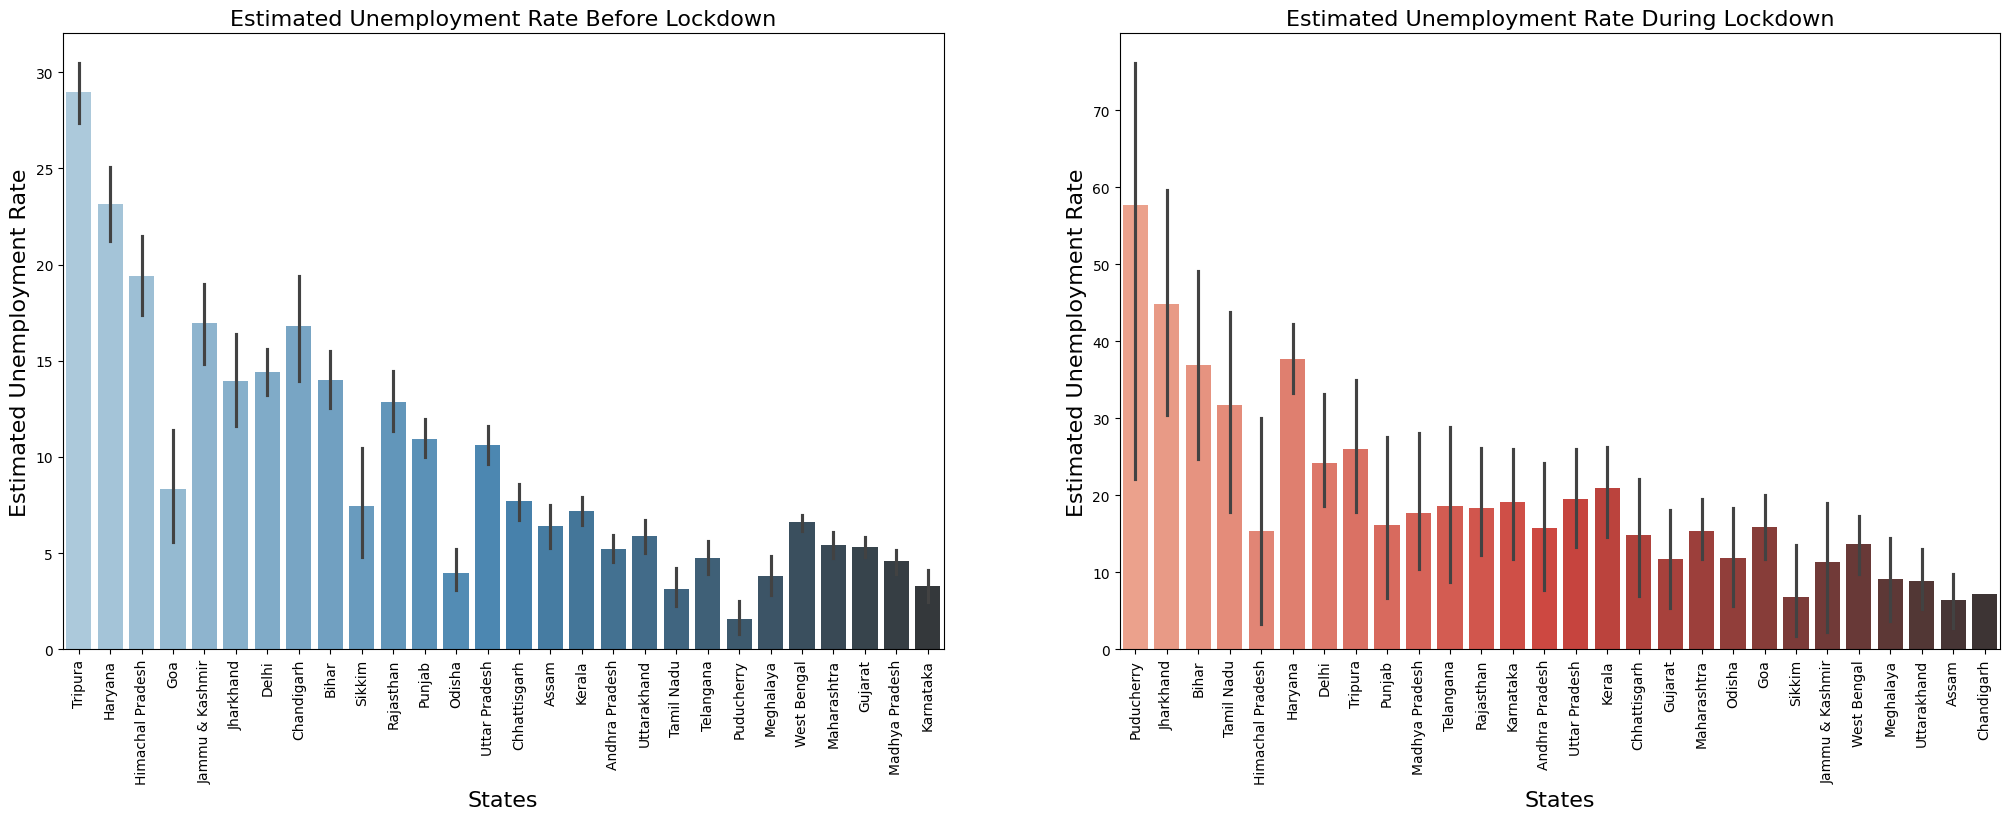

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure size
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot with a gradient palette
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False),
            x="States", y="Estimated Unemployment Rate",
            palette="Blues_d")

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot with a different gradient palette
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False),
            x="States", y="Estimated Unemployment Rate",
            palette="Reds_d")

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()


##### What is/are the insight(s) found from the chart?

The charts show that before the lockdown, states like Tripura, Haryana, and Himachal Pradesh had the highest Estimated Unemployment Rates. However, during the lockdown, Puducherry, Jharkhand, and Bihar rose to the top in terms of Estimated Unemployment Rate.

#### Chart - 4 : State Wise Estimated Employed Workforce

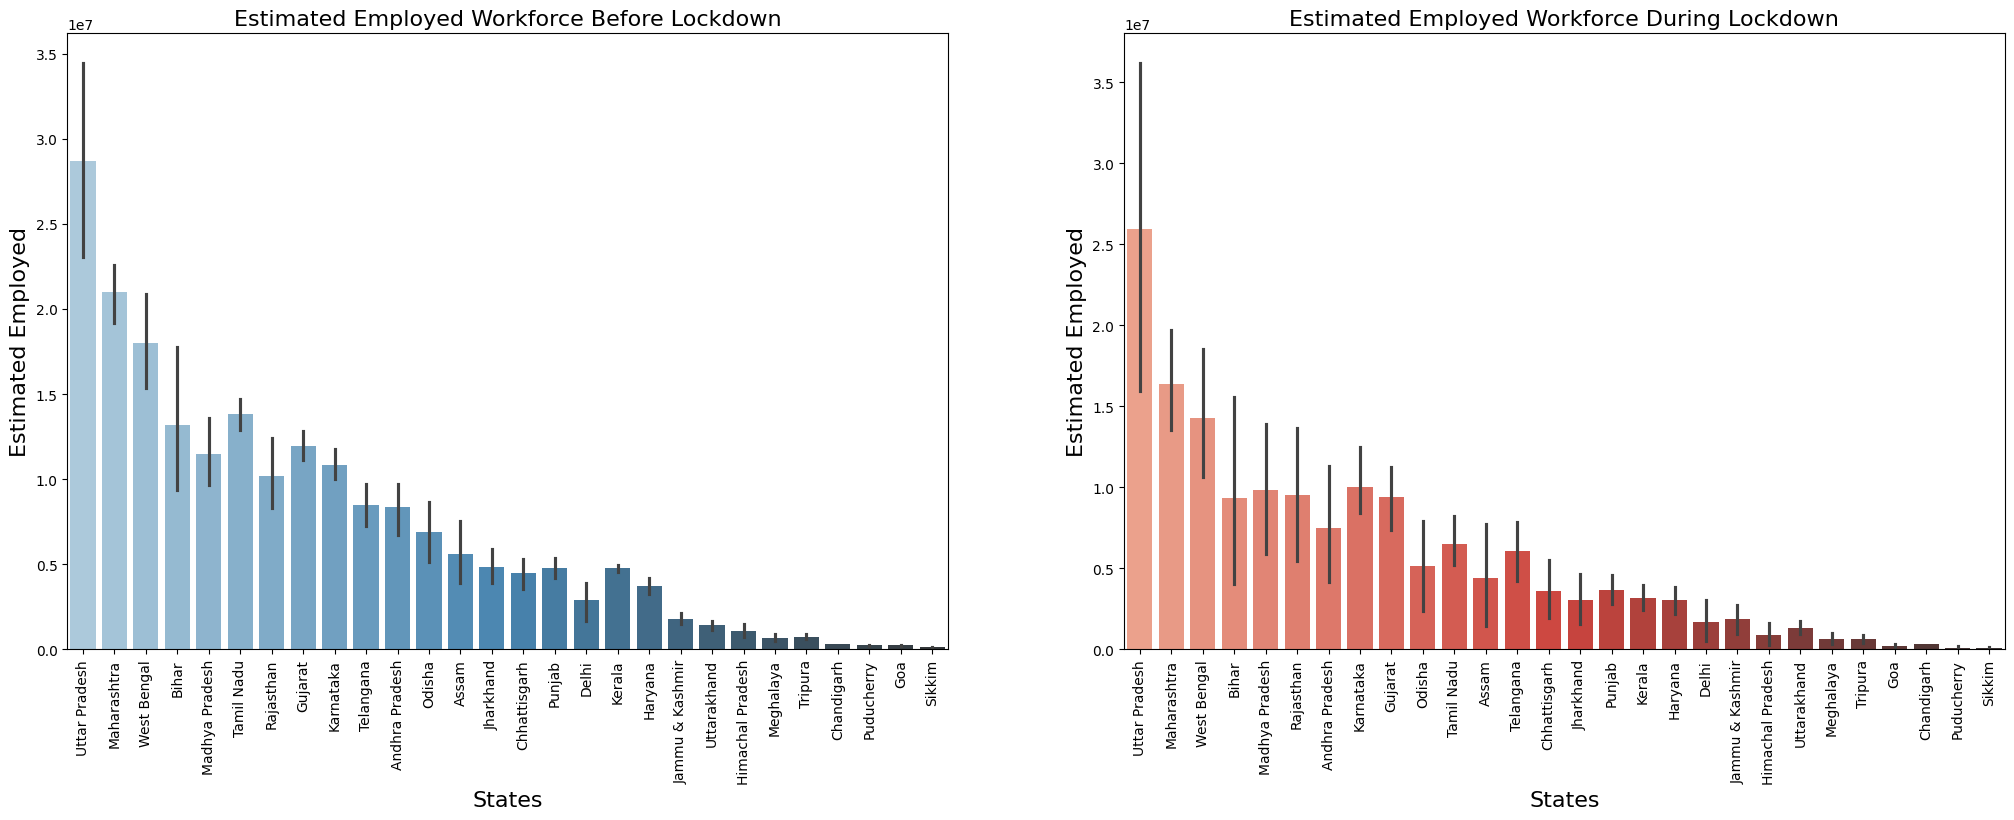

In [88]:
# Define the figure size
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot with a gradient palette
sns.barplot(data=df.sort_values(by='Estimated Employed', ascending=False),
            x="States", y="Estimated Employed",
            palette="Blues_d")

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot with a different gradient palette
sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False),
            x="States", y="Estimated Employed",
            palette="Reds_d")

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()

##### What is/are the insight(s) found from the chart?

The charts reveal that states such as Uttar Pradesh, Maharashtra, and West Bengal ranked highest in terms of Estimated Employed Workforce both before and during the lockdown.

#### Chart - 5 : State Wise Estimated Labour Participation Rate

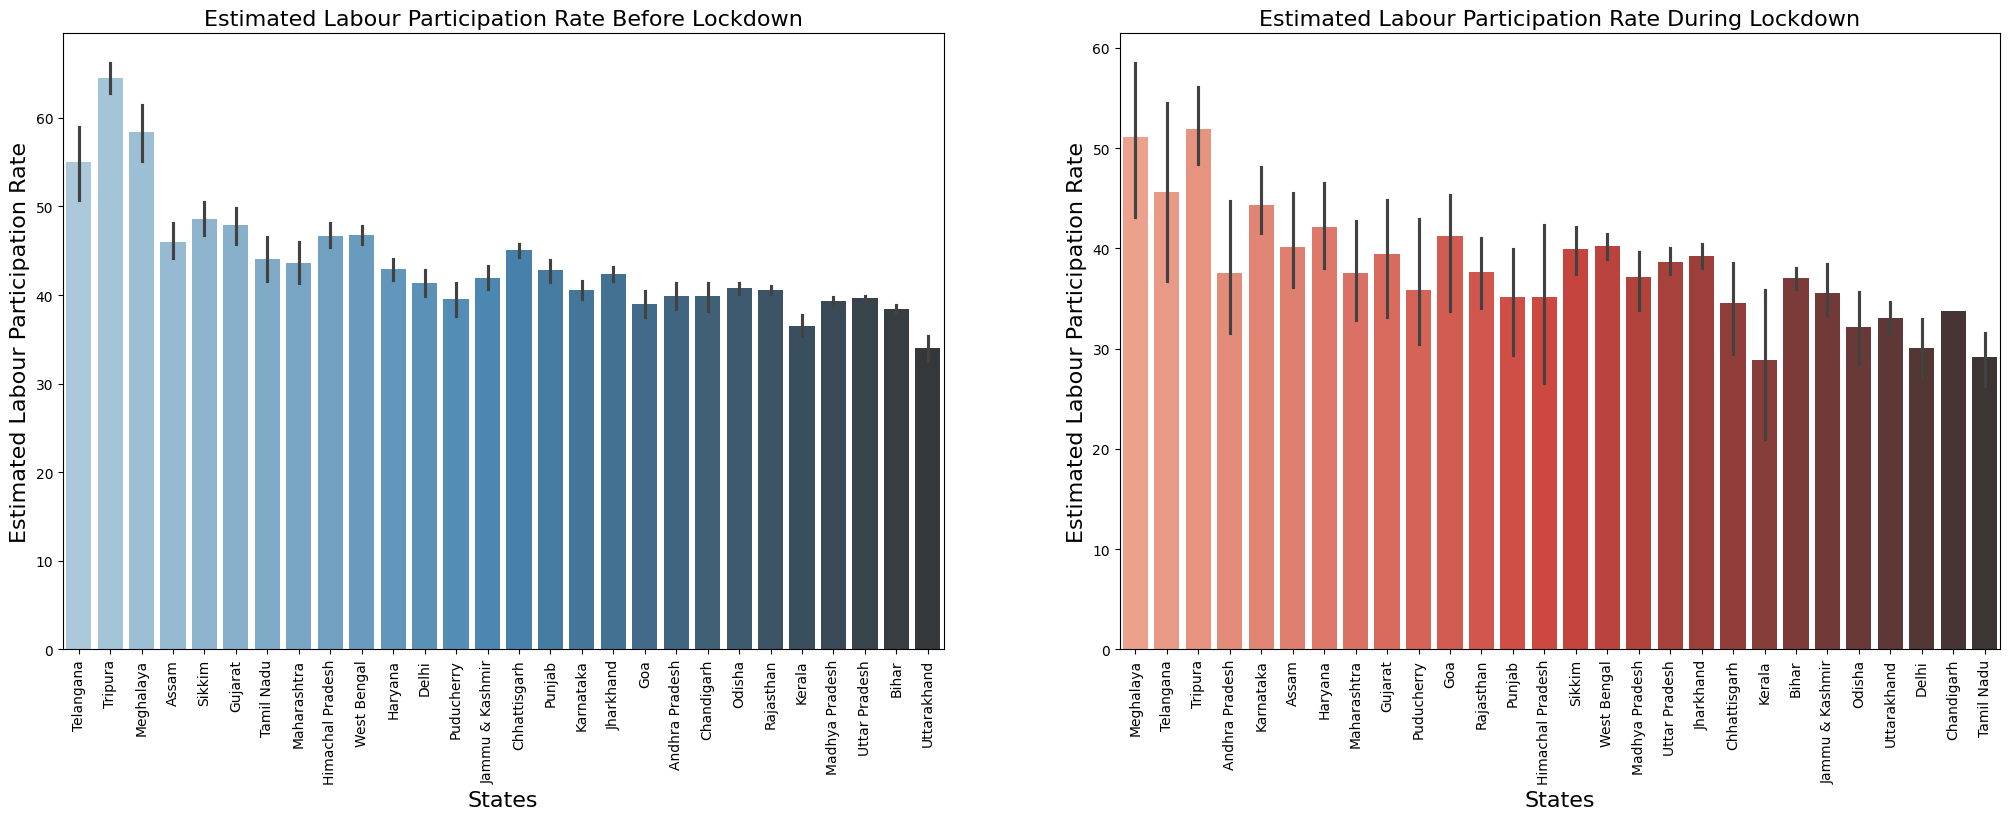

In [91]:
# Define the figure size
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown
plt.subplot(1, 2, 1)
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot with a gradient palette
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False),
            x="States", y="Estimated Labour Participation Rate",
            palette="Blues_d")

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown
plt.subplot(1, 2, 2)
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot with a different gradient palette
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False),
            x="States", y="Estimated Labour Participation Rate",
            palette="Reds_d")

plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side
plt.show()

##### What is/are the insight(s) found from the chart?

The charts indicate that Telangana, Tripura, Meghalaya, and Assam had the highest Estimated Labour Participation Rate before the lockdown. During the lockdown, Meghalaya, Telangana, Tripura, and Andhra Pradesh emerged as the top states in terms of Estimated Labour Participation Rate.

#### Chart - 6 : Correlation Heatmap

In [80]:
# Create new DataFrames
df1_stats = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

df2_stats = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

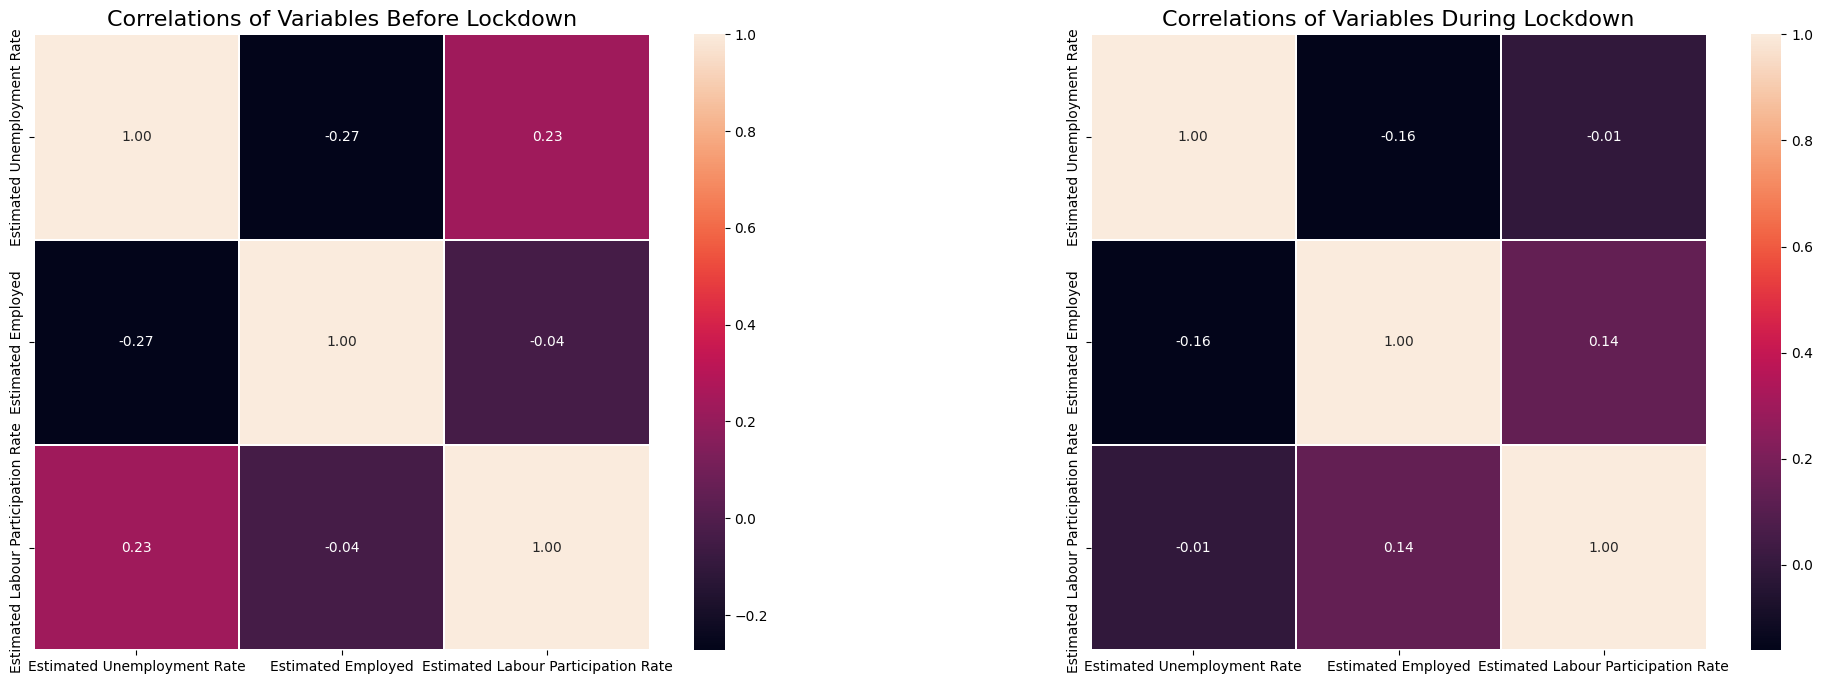

In [81]:
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()

##### What is/are the insight(s) found from the chart?

The heatmaps show a strong negative correlation between the Estimated Unemployment Rate and Estimated Employment for both the pre-lockdown and lockdown periods.

# **Conclusion**

In this data science project, we conducted an in-depth analysis of unemployment rates, a key economic indicator, with a special focus on the challenges posed by the Covid-19 pandemic. Our exploratory data analysis revealed crucial insights into the unemployment trends in India during this period.

1. **Covid-19 Lockdown Impact**: We observed a sharp increase in the Estimated Unemployment Rate during the lockdown, highlighting the severe disruption the pandemic caused in the labor market.

2. **State-Wise Analysis**: Our breakdown by state revealed that Puducherry and Jharkhand experienced the highest Estimated Unemployment Rates during the lockdown, while Haryana and Tripura led before the pandemic.

3. **Shift in Rankings**: The shift in unemployment rankings between the pre-lockdown and lockdown periods was notable. While Tripura, Haryana, and Himachal Pradesh had the highest unemployment rates pre-lockdown, Puducherry, Jharkhand, and Bihar topped the list during the lockdown.

4. **Workforce Challenges**: States like Uttar Pradesh, Maharashtra, and West Bengal consistently faced difficulties in maintaining a high Estimated Employed Workforce, both before and during the pandemic.

5. **Labor Participation**: Our analysis of the Estimated Labour Participation Rate revealed states that demonstrated resilience. Telangana, Tripura, Meghalaya, and Assam ranked highest pre-lockdown, while Meghalaya, Telangana, Tripura, and Andhra Pradesh led during the lockdown.

6. **Correlation Analysis**: We found a strong negative correlation between the Estimated Unemployment Rate and Estimated Employed, showcasing the complex relationship between these two key employment indicators, both before and during the lockdown.

This project provided valuable insights into the economic effects of the Covid-19 pandemic and showcased the potential of data science to analyze and address complex socio-economic issues. The findings support informed policymaking and underscore the importance of data-driven strategies in managing future crises.